# What drives the price of a car?

<center>
    <img src = 'images/kurt.jpeg' width = 90%/>
</center>

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = 'images/crisp.png' width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**User Car sales market drives good revenue, approx $2B in Minnesota alone which is good news for auto dealers, creates more jobs in the industry and benefits state as well in form of taxes.**

**While the markets are booming, Its important for the Used car dealers to constantly refresh their inventory to keep their business growing.**

**So, the key factors that contributes to the price of the car helps delaers to stay competetive with inventory and become valuable in the marketplace.**

**Let's dive into dataset and analyze the key factors that can help us solve the problem.**

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**To understand and prepare the data, we need certain domain knowledge to select the features that contributes more to determine the car price.**
**Several factors influence a car's price, including the vehicle's condition, mileage, age, features, and market demand.**
**Other important considerations include engine performance, fuel efficiency, and the presence of advanced safety and technology features.** 

# Key Features Affecting Car Price:

1. Vehicle Condition:
    A car's overall condition, including interior and exterior wear and tear, as well as any mechanical issues, significantly impacts its value.
 
2. Mileage and Age:
    Older cars generally depreciate faster, and higher mileage can also reduce a car's resale value. 

3. Car Options and Features:
The presence of desirable features like leather upholstery, advanced infotainment systems, and safety packages can increase a car's price. 

4. Market Demand:
Popular and in-demand car models tend to hold their value better and may even command higher prices. 

5. Engine Performance and Fuel Efficiency:
Cars with powerful engines and good fuel economy are often more attractive to buyers and may command higher prices. 

6. Safety and Technology:
Cars with advanced safety features like driver-assistance systems and modern technology features like smartphone integration are in demand and can increase value. 

7. Maintenance History:
A car with a good maintenance history can be more attractive to buyers, as it suggests that the vehicle has been well-maintained and is in good condition. 

8. Accident and Repair Records:
A car's history of accidents and repairs can negatively impact its value. 

9. Brand Reputation:
Certain car brands are known for their reliability and longevity, which can influence their perceived value and impact their price. 

**Based on the above information, using it as domain knowledge, Let's examine, refine our dataset and prepare it.**

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Drop features that does not add much importance in driving the price of the car**
1. ID
2. VIN
3. PaintColor
4. Region - This is almost duplicate information to state feature.

**Engineer new features based on existing Features**

   a. Year feature can be used to create Age of the vehicle.
   
   b. Cylinders feature can be converted into numeric by extracting number from the string and handle the NaN with default values.
   
**Handle missing data based on the samples**
   a. drop missing rows if the percentage is very small.
   b. Impute missing data. Used Lookup based Imputer in this case.
   
      Lookup Imputer,Why?? Mostly, A specific model from manufactures comes with certain number of cylinder, unless remodeled by customer.
      1. We created dictionary lookup on Manufacturer and Model, We imputed the missing data in number of Cylinders feature.
      2. We created lookup based on vehicle_age, Manufacturer and Model, and imputed Vehicle Condition feature.
      3. We created lookup based on State, Manufacturer and Model, and imputed Vehicle Drive feature.
      4. We created lookup based on Manufacturer and Model, and imputed Vehicle type feature.
      5. We created lookup based on Manufacturer and type, and imputed Vehicle size feature.      

**Use appropriate encoding methods o convert the categorical into numerical features.**

   a. OneHot Encoding - One Hot encoding suits well for this dataset for all categorical features.

**Once the above steps are completed, 

    Drop Year column as Age of vehicle provides similar information.
    
    Drop Model column as well because it has high cardinality and adds too many dimesion when encoded using OHE**

**Filter rows with price != 0 and price > 250,000. The condition of the vehicle is shown good and Excellent but zero price did not make sense.**


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [43]:
#Read data fron vehicles dataset
data = pd.read_csv('data/vehicles.csv')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [45]:
## Drop features that does not add much importance in driving the price of the car
data = data.drop(columns=['id','VIN','region','paint_color'])
data = data.dropna(subset=['year','manufacturer','model','odometer','title_status'])

## Create new feature Vehicle age from the Year feature
data['vehicle_age'] = datetime.now().year - data['year']

In [5]:
data.tail(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state,vehicle_age
426857,41990,2019.0,toyota,4runner limited sport,good,6 cylinders,gas,36630.0,clean,other,4wd,NaN,SUV,wy,6.0
426858,51990,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,6814.0,clean,other,fwd,NaN,other,wy,5.0
426859,48590,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,7701.0,clean,other,fwd,NaN,other,wy,5.0
426860,39990,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,41664.0,clean,automatic,4wd,NaN,other,wy,8.0
426861,30990,2019.0,alfa-romeo,romeo giulia ti sedan 4d,good,NaN,other,3883.0,clean,other,NaN,NaN,sedan,wy,6.0
426864,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,NaN,NaN,SUV,wy,9.0
426865,34590,2020.0,alfa-romeo,romeo giulia sedan 4d,good,NaN,other,2498.0,clean,other,rwd,NaN,sedan,wy,5.0
426866,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,NaN,other,wy,9.0
426867,28990,2018.0,jaguar,xe 25t prestige sedan 4d,good,NaN,other,16841.0,clean,other,rwd,NaN,sedan,wy,7.0
426868,0,2010.0,toyota,venza,excellent,6 cylinders,gas,155000.0,clean,automatic,4wd,NaN,NaN,wy,15.0


In [6]:
## Check for missing data
data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition       160353
cylinders       163233
fuel              1566
odometer             0
title_status         0
transmission      1556
drive           116053
size            280206
type             82852
state                0
vehicle_age          0
dtype: int64

In [8]:
#Create a lookup dictionary from non-missing values
lookup = data.dropna().set_index(['manufacturer', 'model'])['cylinders'].to_dict()

# Step 2: Fill missing values based on lookup
start = time.time()
for index, row in data.iterrows():
    if pd.isnull(row['cylinders']):  #Check for missing data
        key = (row['manufacturer'], row['model'])
        if key in lookup:
            data.at[index, 'cylinders'] = lookup[key]  # Fill with existing value
end = time.time()

print("\nTime taken for imputation:\n", end - start)


Time taken for imputation:
 54.14584136009216


In [10]:
# Create a lookup dictionary from non-missing values
lookup = (data.dropna().groupby(['vehicle_age','manufacturer', 'model'])['condition'].agg(lambda x: x.mode()[0]).to_dict())

# Step 2: Fill missing values based on lookup
start = time.time()
for index, row in data.iterrows():
    if pd.isnull(row['condition']):  # Check for missing data
        key = (row['vehicle_age'],row['manufacturer'], row['model'])
        if key in lookup:
            data.at[index, 'condition'] = lookup[key]  # Fill with existing value
end = time.time()

print("\nTime taken for imputation:\n", end - start)


Time taken for imputation:
 41.462772846221924


In [12]:
# Create a lookup dictionary from non-missing values
lookup = (data.dropna().groupby(['manufacturer','model', 'state'])['drive'].agg(lambda x: x.mode()[0]).to_dict())

# Step 2: Fill missing values based on lookup
start = time.time()
for index, row in data.iterrows():
    if pd.isnull(row['drive']):  # Check for missing data
        key = (row['manufacturer'], row['model'], row['state'])
        if key in lookup:
            data.at[index, 'drive'] = lookup[key]  # Fill with existing value
end = time.time()

print("\nTime taken for imputation:\n", end - start)


Time taken for imputation:
 34.76379585266113


In [13]:
# Sample dataset with missing values
# Step 1: Create a lookup dictionary from non-missing values
lookup = (data.dropna().groupby(['manufacturer','model'])['type'].agg(lambda x: x.mode()[0]).to_dict())

# Step 2: Fill missing values based on lookup
start = time.time()
for index, row in data.iterrows():
    if pd.isnull(row['type']):  
        key = (row['manufacturer'], row['model'])
        if key in lookup:
            data.at[index, 'type'] = lookup[key]  # Fill with existing value
end = time.time()

print("\nTime taken for imputation:\n", end - start)


Time taken for imputation:
 34.6140570640564


In [14]:
# Create a lookup dictionary from non-missing values
lookup = (data.dropna().groupby(['manufacturer', 'type'])['size'].agg(lambda x: x.mode()[0]).to_dict())

# Step 2: Fill missing values based on lookup
start = time.time()
for index, row in data.iterrows():
    if pd.isnull(row['size']):  # Check for missing data
        key = (row['manufacturer'], row['type'])
        if key in lookup:
            data.at[index, 'size'] = lookup[key]  # Fill with existing value
end = time.time()

print("\nTime taken for imputation:\n", end - start)


Time taken for imputation:
 46.742619037628174


In [16]:
## Drop rows with missing data after imputation
data = data.dropna(subset=['condition','cylinders','transmission','drive','size','type','fuel'])
data = data.drop(columns=['year'])

In [17]:
#dataset info after imputation and dropping rows
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286726 entries, 28 to 426878
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         286726 non-null  int64  
 1   manufacturer  286726 non-null  object 
 2   model         286726 non-null  object 
 3   condition     286726 non-null  object 
 4   cylinders     286726 non-null  object 
 5   fuel          286726 non-null  object 
 6   odometer      286726 non-null  float64
 7   title_status  286726 non-null  object 
 8   transmission  286726 non-null  object 
 9   drive         286726 non-null  object 
 10  size          286726 non-null  object 
 11  type          286726 non-null  object 
 12  state         286726 non-null  object 
 13  vehicle_age   286726 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 32.8+ MB


In [18]:
## Convert cylinders column into numeric.

condition_mapping = {'other': 1}
data['cylinders'] = data['cylinders'].str.extract(r'(\d+)').astype(float)
data['cylinders'] = data['cylinders'].fillna(1)

In [20]:
data['cylinders'].value_counts()

cylinders
4.0     101084
6.0      98323
8.0      81307
5.0       2270
10.0      1243
3.0       1223
1.0       1200
12.0        76
Name: count, dtype: int64

In [21]:
## No missing values at this point
data.isnull().sum()

price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
state           0
vehicle_age     0
dtype: int64

In [22]:
##Drop the model column as it will add more features with encoding
data = data.drop(columns=['model'])

In [23]:
data.head(20)

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state,vehicle_age
28,22590,chevrolet,good,8.0,gas,71229.0,clean,other,rwd,full-size,pickup,al,15.0
31,15000,ford,excellent,6.0,gas,128000.0,clean,automatic,rwd,full-size,truck,al,12.0
32,27990,gmc,good,8.0,gas,68696.0,clean,other,4wd,full-size,pickup,al,13.0
33,34590,chevrolet,good,6.0,gas,29499.0,clean,other,4wd,full-size,pickup,al,9.0
34,35000,toyota,excellent,6.0,gas,43000.0,clean,automatic,4wd,full-size,truck,al,6.0
35,29990,chevrolet,good,6.0,gas,17302.0,clean,other,4wd,full-size,pickup,al,9.0
36,38590,chevrolet,good,8.0,gas,30237.0,clean,other,rwd,full-size,other,al,14.0
37,4500,jeep,excellent,6.0,gas,192000.0,clean,automatic,4wd,mid-size,SUV,al,33.0
38,32990,jeep,good,6.0,gas,30041.0,clean,other,4wd,full-size,other,al,8.0
40,30990,chevrolet,good,6.0,other,34940.0,clean,other,4wd,full-size,pickup,al,9.0


#### Visualizations

In [24]:
#Filter the data with higher price vehicles
# The condition of the vehicle is shown good and Excellent but zero price did not make sense.

data_filtered = data.query("(price > 1000 and price < 226000) and (vehicle_age < 85)")
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255716 entries, 28 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         255716 non-null  int64  
 1   manufacturer  255716 non-null  object 
 2   condition     255716 non-null  object 
 3   cylinders     255716 non-null  float64
 4   fuel          255716 non-null  object 
 5   odometer      255716 non-null  float64
 6   title_status  255716 non-null  object 
 7   transmission  255716 non-null  object 
 8   drive         255716 non-null  object 
 9   size          255716 non-null  object 
 10  type          255716 non-null  object 
 11  state         255716 non-null  object 
 12  vehicle_age   255716 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 27.3+ MB


In [46]:
data_filtered.describe()

,price,cylinders,odometer,vehicle_age
count,255716.000000,255716.000000,2.557160e+05,255716.000000
mean,17259.441744,5.850486,1.068844e+05,14.230521
std,13604.248214,1.654502,1.693642e+05,8.048811
min,1004.000000,1.000000,0.000000e+00,3.000000
25%,6995.000000,4.000000,5.358400e+04,9.000000
50%,13000.000000,6.000000,1.000000e+05,12.000000
75%,24500.000000,8.000000,1.440000e+05,17.000000
max,225000.000000,12.000000,1.000000e+07,84.000000


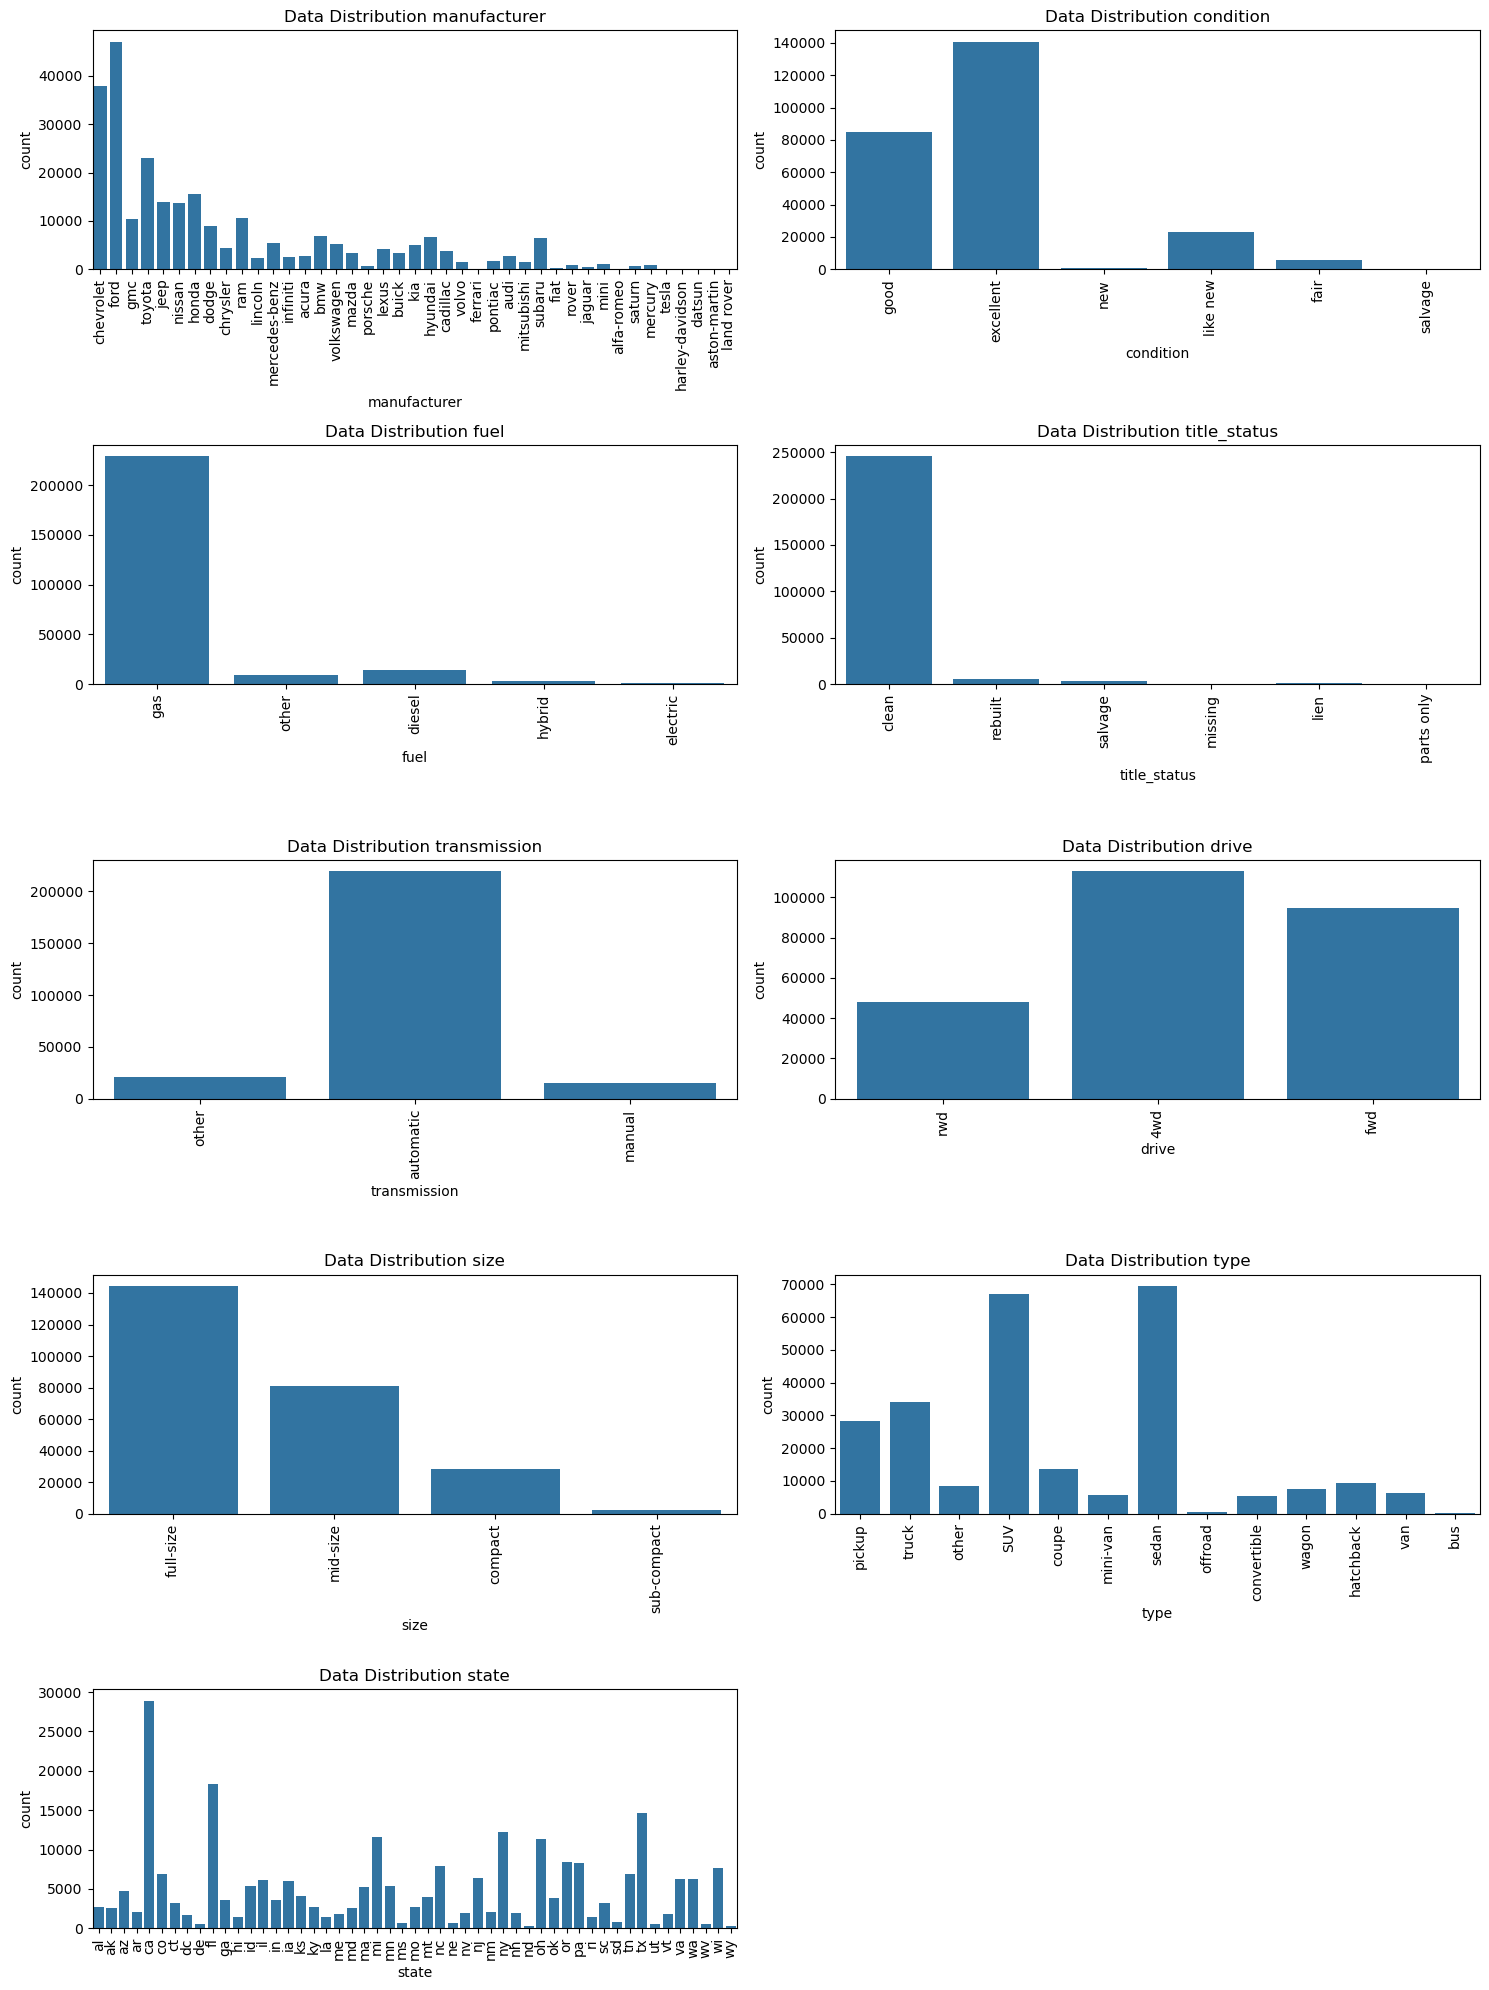

In [90]:
cat_col = data_filtered.select_dtypes(include=['object']).columns
num_col = data_filtered.select_dtypes(include=['float64', 'int64']).columns

rows = int(len(cat_col)/2) + 1
cols = 2
plt.figure(figsize=(15, 20))

for i, col in enumerate(cat_col, 1):
    plt.subplot(rows,cols,i)
    plt.title(f"Data Distribution {col}")
    plt.xticks(rotation=90)
    sns.countplot(data=data_filtered, x=data_filtered[col])

plt.tight_layout()
#plt.savefig('images/Bar_Charts_of_Categorical_Columns_with_Grade.png')
plt.show()

In [74]:
fig = px.scatter(data_filtered, 
                 x="vehicle_age", 
                 y="price", 
                 color="condition",
                 color_continuous_scale="Viridis", 
                 title="Price with vehicle age & condition")

fig.update_layout(width=1500, height=600,template='plotly_white',title_x=0.5)
fig.show()

In [51]:
fig = px.box(data_filtered, 
             x="condition", 
             y="price", 
             color="manufacturer", 
             color_discrete_sequence=px.colors.qualitative.D3,
             title="Price according to manufacturers & condition")

fig.update_layout(width=1200, height=600,template='plotly_white',title_x=0.5)
fig.show()

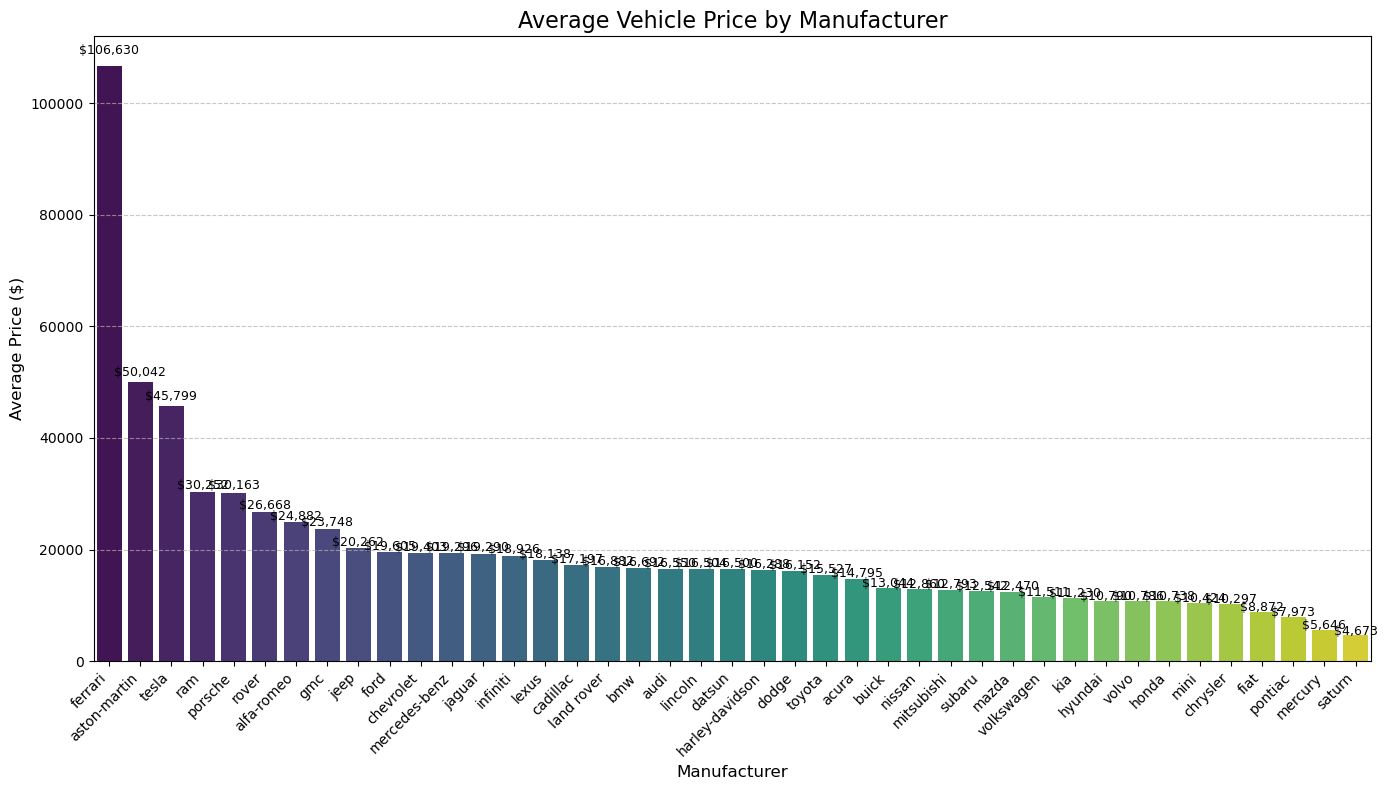

Average Price by Manufacturer:
   manufacturer         price
        ferrari 106629.550000
   aston-martin  50041.875000
          tesla  45799.094891
            ram  30251.715436
        porsche  30163.191523
          rover  26668.214815
     alfa-romeo  24882.154639
            gmc  23747.633848
           jeep  20262.028522
           ford  19605.097919
      chevrolet  19403.402341
  mercedes-benz  19296.196462
         jaguar  19290.161597
       infiniti  18925.685839
          lexus  18138.320486
       cadillac  17196.803393
     land rover  16881.666667
            bmw  16691.507474
           audi  16550.045570
        lincoln  16504.333482
         datsun  16499.666667
harley-davidson  16288.133333
          dodge  16152.026298
         toyota  15527.281830
          acura  14795.006191
          buick  13044.215933
         nissan  12860.215626
     mitsubishi  12793.242051
         subaru  12542.359018
          mazda  12469.882353
     volkswagen  11510.855520
         

In [49]:
# Group by manufacturer and calculate mean price
manufacturer_price = data_filtered.groupby('manufacturer')['price'].mean().reset_index()

# Sort by price for better visualization
manufacturer_price = manufacturer_price.sort_values('price', ascending=False)

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(x='manufacturer', y='price', data=manufacturer_price, palette='viridis')

# Customize the plot
plt.title('Average Vehicle Price by Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add price labels on top of each bar
for i, price in enumerate(manufacturer_price['price']):
    plt.text(i, price + (price*0.02), f'${price:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Optional: Display the data in a table format
print("Average Price by Manufacturer:")
print(manufacturer_price.to_string(index=False))

#### Feature Engineering

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [26]:
cat_col = data_filtered.select_dtypes(include=['object']).columns
num_col = data_filtered.select_dtypes(include=['float64', 'int64']).columns.drop(['price'])

In [27]:
X = data_filtered.drop(columns=['price']) 
y = data_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),  
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_col)  
    ]
)

In [29]:
X_train_std = preprocessor.fit_transform(X_train)
X_test_std = preprocessor.transform(X_test)

In [30]:
num_cols = num_col
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
all_cols = list(num_cols) + list(cat_cols)
all_cols

['cylinders',
 'odometer',
 'vehicle_age',
 'manufacturer_alfa-romeo',
 'manufacturer_aston-martin',
 'manufacturer_audi',
 'manufacturer_bmw',
 'manufacturer_buick',
 'manufacturer_cadillac',
 'manufacturer_chevrolet',
 'manufacturer_chrysler',
 'manufacturer_datsun',
 'manufacturer_dodge',
 'manufacturer_ferrari',
 'manufacturer_fiat',
 'manufacturer_ford',
 'manufacturer_gmc',
 'manufacturer_harley-davidson',
 'manufacturer_honda',
 'manufacturer_hyundai',
 'manufacturer_infiniti',
 'manufacturer_jaguar',
 'manufacturer_jeep',
 'manufacturer_kia',
 'manufacturer_land rover',
 'manufacturer_lexus',
 'manufacturer_lincoln',
 'manufacturer_mazda',
 'manufacturer_mercedes-benz',
 'manufacturer_mercury',
 'manufacturer_mini',
 'manufacturer_mitsubishi',
 'manufacturer_nissan',
 'manufacturer_pontiac',
 'manufacturer_porsche',
 'manufacturer_ram',
 'manufacturer_rover',
 'manufacturer_saturn',
 'manufacturer_subaru',
 'manufacturer_tesla',
 'manufacturer_toyota',
 'manufacturer_volkswagen

In [31]:
X_train_std_df = pd.DataFrame(X_train_std, columns=all_cols)
X_test_std_df = pd.DataFrame(X_test_std, columns=all_cols)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Consider: Linear Regression, Lasso and Ridge models

In [32]:
# Consider Linear, Lasso and Ridge Regression models.

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

models = {
    "Linear Regression": LinearRegression(fit_intercept=False),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}

In [33]:
results_df = pd.DataFrame(columns=["Model", "MSE", "RMSE", "MAE", "R2"])

# Train, Predict & Evaluate each model
for name, model in models.items():
    model.fit(X_train_std_df, y_train)
    y_pred = model.predict(X_test_std_df)

    # Compute metrics with explicit labels parameter
    metrics = {
        "Model": name,
        "MSE": round(mean_squared_error(y_test, y_pred),4),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, y_pred)),4),
        "MAE": round(mean_absolute_error(y_test, y_pred),4),
        "R2": round(r2_score(y_test, y_pred),4)
    }

    # Append metrics to results_df
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

# Display evaluation results
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
               Model           MSE       RMSE        MAE      R2
0  Linear Regression  8.568097e+07  9256.4018  6236.7699  0.5304
1              Lasso  8.150369e+07  9027.9395  6031.7330  0.5533
2              Ridge  8.137613e+07  9020.8717  6027.9776  0.5540


Lets Perform cross validation and hyper tuning to Ridge and Lasso Models

In [34]:
lasso = Lasso(random_state=42)
ridge = Ridge(random_state=42)

param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10,100] }
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10,100] }

lasso_grid = GridSearchCV(
    estimator=lasso,
    param_grid=param_lasso,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_ridge,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1, 
    verbose=1
)

In [35]:
# Fit the models (assuming X_train_std_df and y_train are already defined)
print("Tuning Lasso model...")
lasso_grid.fit(X_train_std_df, y_train)

print("Tuning Ridge model...")
ridge_grid.fit(X_train_std_df, y_train)

Tuning Lasso model...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning Ridge model...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [36]:
# Get the best parameters
print("\nBest parameters for Lasso:", lasso_grid.best_params_)
print("Best parameters for Ridge:", ridge_grid.best_params_)


Best parameters for Lasso: {'alpha': 0.01}
Best parameters for Ridge: {'alpha': 0.1}


In [37]:
# Create models with best parameters
best_lasso = Lasso(**lasso_grid.best_params_, random_state=42)
best_ridge = Ridge(**ridge_grid.best_params_, random_state=42)

# Train the models with best parameters
best_lasso.fit(X_train_std_df, y_train)
best_ridge.fit(X_train_std_df, y_train)

# Make predictions
lasso_pred = best_lasso.predict(X_test_std_df)
ridge_pred = best_ridge.predict(X_test_std_df)

In [38]:
results = []

# Compute metrics for Lasso
lasso_metrics = {
    "Model": "Lasso (Tuned)",
    "MSE": round(mean_squared_error(y_test, lasso_pred), 4),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, lasso_pred)), 4),
    "MAE": round(mean_absolute_error(y_test, lasso_pred), 4),
    "R2": round(r2_score(y_test, lasso_pred), 4)
}
results.append(lasso_metrics)

# Compute metrics for Ridge
ridge_metrics = {
    "Model": "Ridge (Tuned)",
    "MSE": round(mean_squared_error(y_test, ridge_pred), 4),
    "RMSE": round(np.sqrt(mean_squared_error(y_test, ridge_pred)), 4),
    "MAE": round(mean_absolute_error(y_test, ridge_pred), 4),
    "R2": round(r2_score(y_test, ridge_pred), 4)
}
results.append(ridge_metrics)

# Create and display results dataframe
results_df = pd.DataFrame(results)
print("\nModel Performance After Hyperparameter Tuning:")
print(results_df)


Model Performance After Hyperparameter Tuning:
           Model           MSE       RMSE        MAE     R2
0  Lasso (Tuned)  8.137211e+07  9020.6489  6027.8451  0.554
1  Ridge (Tuned)  8.137281e+07  9020.6878  6027.8668  0.554


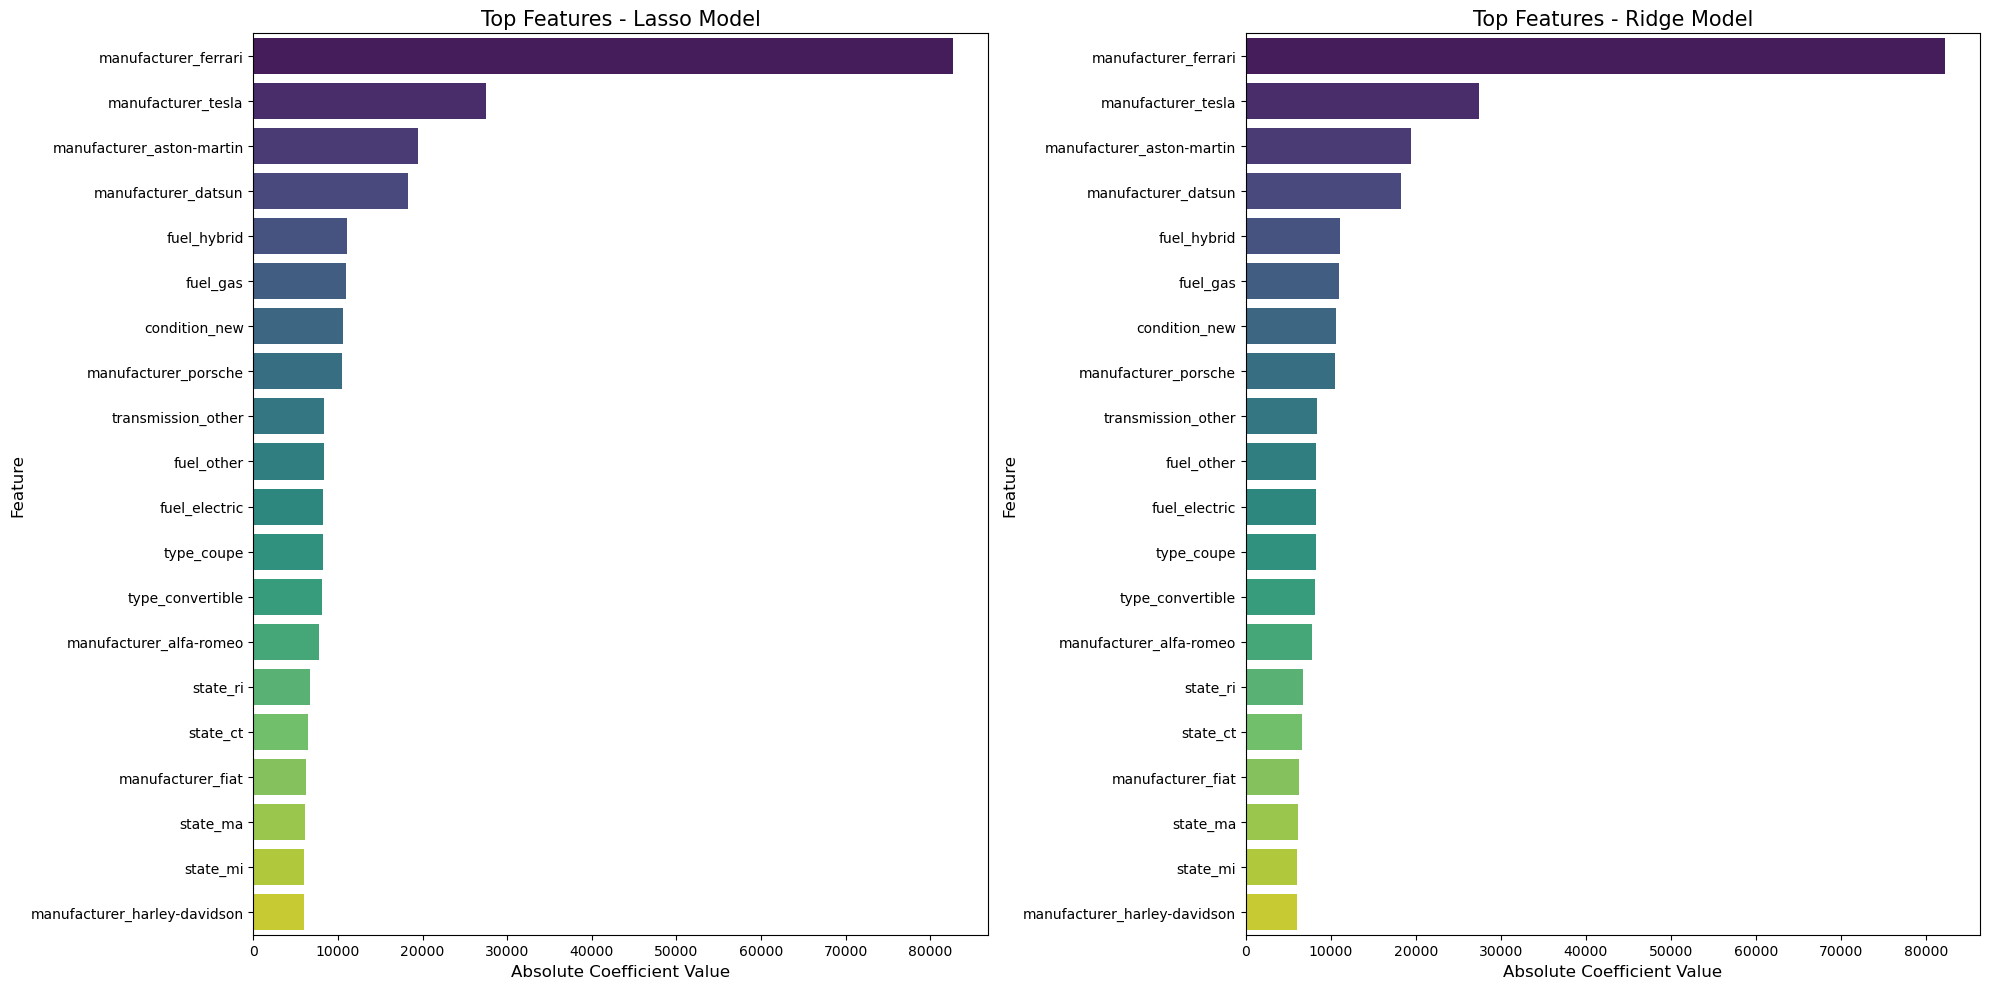

In [40]:
# Extract the best models from the grid search results
best_lasso = lasso_grid.best_estimator_
best_ridge = ridge_grid.best_estimator_

# Get feature names (assuming X_train_std_df is a DataFrame with column names)
feature_names = X_train_std_df.columns

# Get coefficients from both models
lasso_coef = best_lasso.coef_
ridge_coef = best_ridge.coef_

# Create DataFrames for easier manipulation
lasso_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(lasso_coef)  # Taking absolute values for importance
})

ridge_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(ridge_coef)  # Taking absolute values for importance
})

# Sort by importance
lasso_importance = lasso_importance.sort_values('Importance', ascending=False)
ridge_importance = ridge_importance.sort_values('Importance', ascending=False)

# Plot top N features (e.g., top 20)
n_top_features = 20

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot Lasso feature importance
sns.barplot(x='Importance', y='Feature', data=lasso_importance.head(n_top_features), ax=ax1, palette='viridis')
ax1.set_title('Top Features - Lasso Model', fontsize=15)
ax1.set_xlabel('Absolute Coefficient Value', fontsize=12)
ax1.set_ylabel('Feature', fontsize=12)

# Plot Ridge feature importance
sns.barplot(x='Importance', y='Feature', data=ridge_importance.head(n_top_features), ax=ax2, palette='viridis')
ax2.set_title('Top Features - Ridge Model', fontsize=15)
ax2.set_xlabel('Absolute Coefficient Value', fontsize=12)
ax2.set_ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

1. We can select Lasso model for our evaluation and presentation.
2. The dataset is inventory of used cars with prices. The price is not consistent for given manufacturer, model and condition.

   So, We may need to go back to Data Understanding and clean the data more and evaluate the dataset with Lasso Regression model as final step.
3. As the data is very random, the best way is to split them according to state and Top 10 Manufacturers and perform analysis.
4. Model is biased towards the higher priced cars and choosing those features with more omprtance in driving price. Go back to data cleaning and remove the outliers.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### After revisiting the data and removing the outlier brands and priced vehicles. Below is the report for our used car dealers.

1. Vehicle Age and Odometer are prime contributors for customer choice. Newer Vehicles can drive more customers.
2. Trucks, Sedans, SUVs are most commonly used vehicle types. These vehicle type are important to be in dealer inventory.
3. Ford, Cheverolet, Jeep brands have good average price and very affordable to customers.
4. State of California car delaers can have little inventory of vintage and expensive brands as well.
5. 
Overall, Ford, Cheverolet & Jeep branded Trucks, Sedans and SUVs which are newer and in good condition is the prime focus in our inventory.

In [53]:
# Display Feature Importance after additional data filtering of outliers

from IPython.display import Image, display, HTML
display(HTML("<center><img src='images/Vehicle_Price_Important_Features.png' width='60%'/></center>"))